In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Summer_Sports_Experience__2017_to_2021.csv')

In [3]:
df.isnull().sum()

Borough Location          0
Park Location             0
Sports Played             0
Week Start Date           0
Week End Date             0
Sunday's Attendance       0
Monday's Attendance       0
Tuesday's Attendance      0
Wednesday's Attendance    0
Thursday's Attendance     0
Friday's Attendance       0
Saturday's Attendance     0
Attendance Sum            0
dtype: int64

In [4]:
df.duplicated().mean()

0.004705882352941176

Title: Summer_Sports_Experience from 2017_to_2021

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Borough Location        425 non-null    object
 1   Park Location           425 non-null    object
 2   Sports Played           425 non-null    object
 3   Week Start Date         425 non-null    object
 4   Week End Date           425 non-null    object
 5   Sunday's Attendance     425 non-null    int64 
 6   Monday's Attendance     425 non-null    int64 
 7   Tuesday's Attendance    425 non-null    int64 
 8   Wednesday's Attendance  425 non-null    int64 
 9   Thursday's Attendance   425 non-null    int64 
 10  Friday's Attendance     425 non-null    int64 
 11  Saturday's Attendance   425 non-null    int64 
 12  Attendance Sum          425 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 43.3+ KB


TWO refined questions:

Q1: Which team sports with high attendance rates saw the steepest decline in participation following the COVID-19 pandemic, and how might the nature of these sports contribute to this decrease?

In [6]:
df_new_order = pd.read_csv('Summer_Sports_Experience__2017_to_2021.csv')
df_new_order.head()

,Borough Location,Park Location,Sports Played,Week Start Date,Week End Date,Sunday's Attendance,Monday's Attendance,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Attendance Sum
0,Queens,Playground for All Children,"Soccer, Basketball, ultimate Frisbee",04/23/2017,04/22/2017,25,20,30,26,22,100,37,260
1,Queens,Playground for All Children,Basketball,04/30/2017,05/06/2017,250,95,120,180,400,0,0,1045
2,Queens,Playground for All Children,Soccer,05/07/2017,05/13/2017,590,180,250,440,550,730,0,2740
3,Queens,Playground for All Children,Pillow Polo,05/14/2017,05/20/2017,550,708,58,680,975,333,670,3974
4,Queens,Playground for All Children,All sports,05/21/2017,05/27/2017,300,375,280,200,0,370,800,2325


In [7]:
# Convert 'Week Start Date' to datetime
df_new_order['Week Start Date'] = pd.to_datetime(df_new_order['Week Start Date'])

# Extract Year from 'Week Start Date'
df_new_order['Year'] = df_new_order['Week Start Date'].dt.year

# Sum weekday (Mon + Tue) and weekend (Sat + Sun) attendance
df_new_order['Weekday Attendance'] = df_new_order["Monday's Attendance"] + df_new_order["Tuesday's Attendance"]
df_new_order['Weekend Attendance'] = df_new_order["Saturday's Attendance"] + df_new_order["Sunday's Attendance"]

# Group by sport to get mean weekday & weekend attendance
attendance_df = df_new_order.groupby('Sports Played')[['Weekday Attendance', 'Weekend Attendance']].mean()

# Select top 30 sports by Weekend Attendance
attendance_summary = attendance_df.nlargest(30, 'Weekend Attendance')

# Get average total attendance by year
attendance_trends = df_new_order.groupby('Year')['Attendance Sum'].mean().reset_index()

# If you want 'Year' as string for categorical plotting
attendance_trends['Year'] = attendance_trends['Year'].astype(str)

# Segment the data into Pre-COVID, COVID, and Post-COVID
pre_covid = df_new_order[df_new_order['Year'].between(2017, 2019)]
covid = df_new_order[df_new_order['Year'] == 2020]
post_covid = df_new_order[df_new_order['Year'] == 2021]

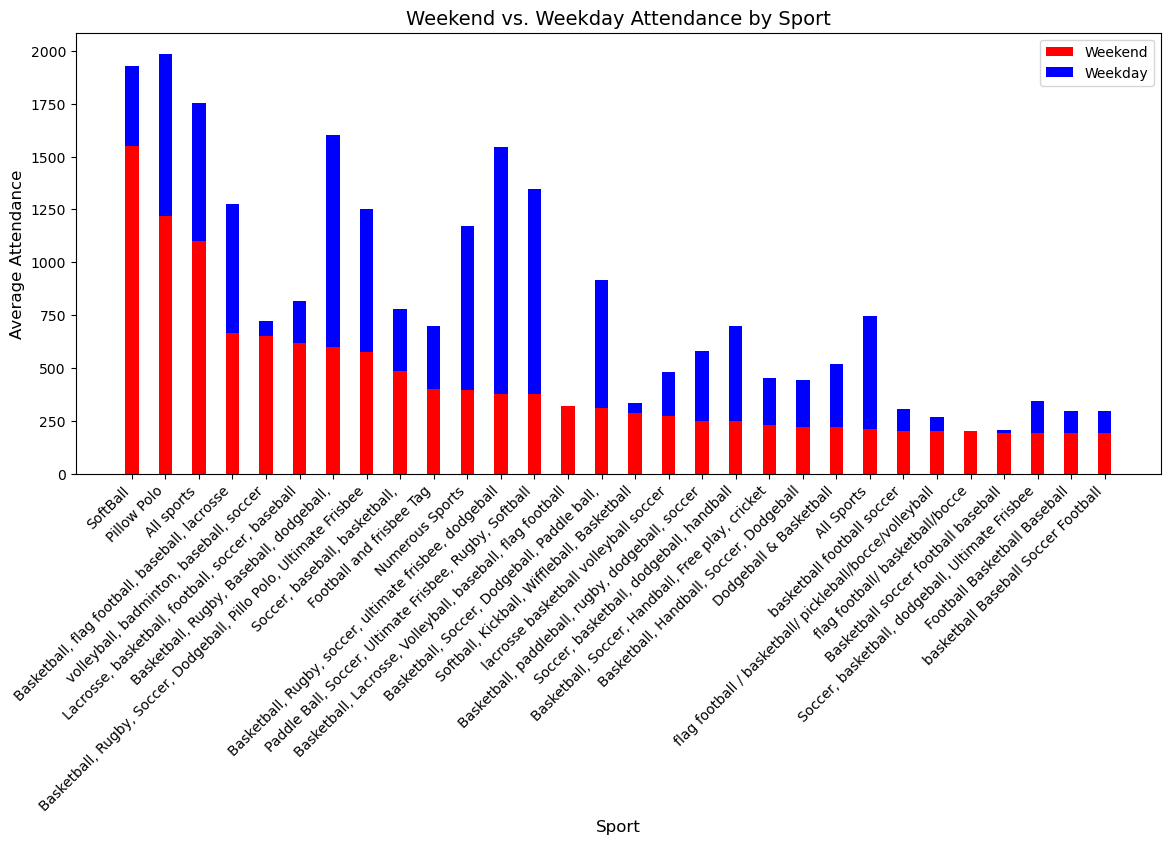

In [8]:
# Define bar width
bar_width = 0.4

# Create x-axis positions
x_pos = np.arange(len(attendance_summary))

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 7))

ax.bar(x_pos, attendance_summary['Weekend Attendance'], bar_width, label='Weekend', color='red')
ax.bar(x_pos, attendance_summary['Weekday Attendance'], bar_width, bottom=attendance_summary['Weekend Attendance'], label='Weekday', color='blue')

# Set labels and title
ax.set_title('Weekend vs. Weekday Attendance by Sport', fontsize=14)
ax.set_xlabel('Sport', fontsize=12)
ax.set_ylabel('Average Attendance', fontsize=12)
ax.set_xticks(x_pos)
ax.set_xticklabels(attendance_summary.index, rotation=45, ha='right')

# Add legend
ax.legend()

# Fix layout issue
plt.subplots_adjust(bottom=0.25)  # Adjust bottom margin to avoid label cutoff

plt.show()

Q2: Which sports became increasingly popular in the wake of the Covid-19 pandemic, and do they share characteristics such as being outdoor activities, individual-focused, or conducive to social distancing?


In [9]:
df_new_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Borough Location        425 non-null    object        
 1   Park Location           425 non-null    object        
 2   Sports Played           425 non-null    object        
 3   Week Start Date         425 non-null    datetime64[ns]
 4   Week End Date           425 non-null    object        
 5   Sunday's Attendance     425 non-null    int64         
 6   Monday's Attendance     425 non-null    int64         
 7   Tuesday's Attendance    425 non-null    int64         
 8   Wednesday's Attendance  425 non-null    int64         
 9   Thursday's Attendance   425 non-null    int64         
 10  Friday's Attendance     425 non-null    int64         
 11  Saturday's Attendance   425 non-null    int64         
 12  Attendance Sum          425 non-null    int64     

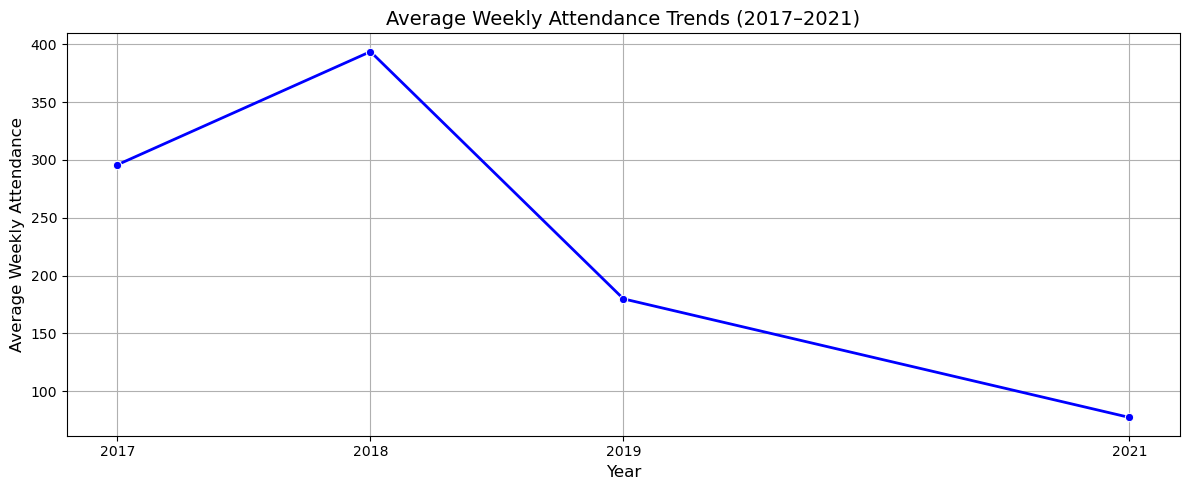

In [10]:
# Make sure the 'Year' column is integer (if not already)
attendance_trends['Year'] = attendance_trends['Year'].astype(int)

# Create the line plot
plt.figure(figsize=(12, 5))
sns.lineplot(x='Year', y='Attendance Sum', data=attendance_trends, marker='o', linewidth=2, color='blue')

# Set x-axis ticks to show only whole years
plt.xticks(attendance_trends['Year'].unique())

# Add title and axis labels
plt.title('Average Weekly Attendance Trends (2017–2021)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Weekly Attendance', fontsize=12)

# Add grid for readability
plt.grid(True)
plt.tight_layout()
plt.show()

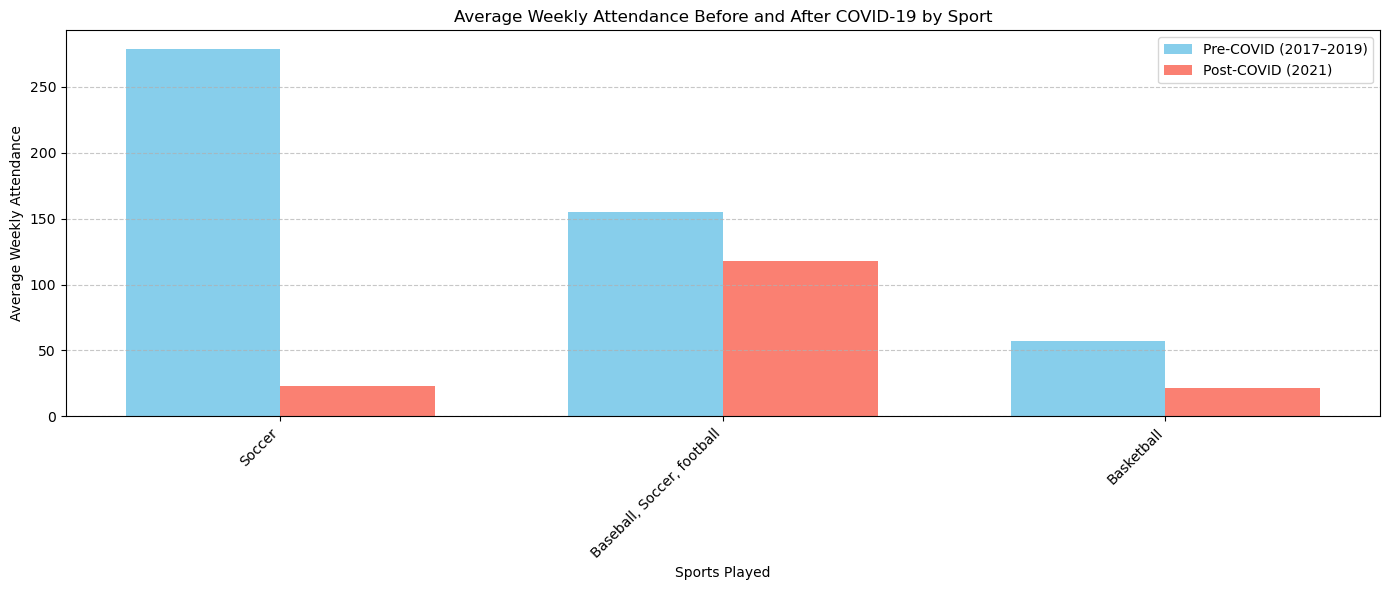

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Summer_Sports_Experience__2017_to_2021.csv")

# Convert 'Week Start Date' to datetime and extract year
df['Week Start Date'] = pd.to_datetime(df['Week Start Date'])
df['Year'] = df['Week Start Date'].dt.year

# Melt the attendance columns into a single column per day
attendance_cols = [
    "Sunday's Attendance", "Monday's Attendance", "Tuesday's Attendance",
    "Wednesday's Attendance", "Thursday's Attendance",
    "Friday's Attendance", "Saturday's Attendance"
]

# Melt to long format (optional but useful for some visualizations)
# df_long = df.melt(id_vars=['Sports Played', 'Year'], value_vars=attendance_cols, var_name='Day', value_name='Attendance')

# Sum attendance for each week per sport (already exists as 'Attendance Sum')
# Calculate average weekly attendance before and after COVID
pre_covid = df[df['Year'].isin([2017, 2018, 2019])]
post_covid = df[df['Year'] == 2021]

# Group by sport and calculate mean attendance
pre_avg = pre_covid.groupby('Sports Played')['Attendance Sum'].mean()
post_avg = post_covid.groupby('Sports Played')['Attendance Sum'].mean()

# Combine into one DataFrame
combined = pd.DataFrame({
    'Pre-COVID (2017–2019)': pre_avg,
    'Post-COVID (2021)': post_avg
}).dropna()

# Sort by pre-COVID attendance for cleaner display
combined = combined.sort_values('Pre-COVID (2017–2019)', ascending=False)

# Plotting
plt.figure(figsize=(14, 6))
bar_width = 0.35
index = range(len(combined))

plt.bar(index, combined['Pre-COVID (2017–2019)'], width=bar_width, label='Pre-COVID (2017–2019)', color='skyblue')
plt.bar([i + bar_width for i in index], combined['Post-COVID (2021)'], width=bar_width, label='Post-COVID (2021)', color='salmon')

plt.xlabel('Sports Played')
plt.ylabel('Average Weekly Attendance')
plt.title('Average Weekly Attendance Before and After COVID-19 by Sport')
plt.xticks([i + bar_width / 2 for i in index], combined.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Borough Location        425 non-null    object        
 1   Park Location           425 non-null    object        
 2   Sports Played           425 non-null    object        
 3   Week Start Date         425 non-null    datetime64[ns]
 4   Week End Date           425 non-null    object        
 5   Sunday's Attendance     425 non-null    int64         
 6   Monday's Attendance     425 non-null    int64         
 7   Tuesday's Attendance    425 non-null    int64         
 8   Wednesday's Attendance  425 non-null    int64         
 9   Thursday's Attendance   425 non-null    int64         
 10  Friday's Attendance     425 non-null    int64         
 11  Saturday's Attendance   425 non-null    int64         
 12  Attendance Sum          425 non-null    int64     

In [13]:
df.head()

,Borough Location,Park Location,Sports Played,Week Start Date,Week End Date,Sunday's Attendance,Monday's Attendance,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Attendance Sum,Year
0,Queens,Playground for All Children,"Soccer, Basketball, ultimate Frisbee",2017-04-23,04/22/2017,25,20,30,26,22,100,37,260,2017
1,Queens,Playground for All Children,Basketball,2017-04-30,05/06/2017,250,95,120,180,400,0,0,1045,2017
2,Queens,Playground for All Children,Soccer,2017-05-07,05/13/2017,590,180,250,440,550,730,0,2740,2017
3,Queens,Playground for All Children,Pillow Polo,2017-05-14,05/20/2017,550,708,58,680,975,333,670,3974,2017
4,Queens,Playground for All Children,All sports,2017-05-21,05/27/2017,300,375,280,200,0,370,800,2325,2017


In [14]:
# prompt: Using dataframe df: clean the dataset

import pandas as pd

# Convert 'Week End Date' to datetime objects
df['Week End Date'] = pd.to_datetime(df['Week End Date'])

# Handle missing values (if any) - replace with 0 for numerical columns
numerical_cols = ['Sunday\'s Attendance', 'Monday\'s Attendance', 'Tuesday\'s Attendance',
                  'Wednesday\'s Attendance', 'Thursday\'s Attendance', 'Friday\'s Attendance',
                  'Saturday\'s Attendance', 'Attendance Sum']

for col in numerical_cols:
  df[col] = df[col].fillna(0)

# Check for duplicates
print("Number of duplicates:", df.duplicated().sum())
# Remove duplicates (if any)
df = df.drop_duplicates()

# Check data types
print(df.dtypes)

# Example: Convert 'Year' column to integer (if it's not already)
df["Year"] = df["Year"].astype(int)

# Print updated info
print(df.info())



Number of duplicates: 2
Borough Location                  object
Park Location                     object
Sports Played                     object
Week Start Date           datetime64[ns]
Week End Date             datetime64[ns]
Sunday's Attendance                int64
Monday's Attendance                int64
Tuesday's Attendance               int64
Wednesday's Attendance             int64
Thursday's Attendance              int64
Friday's Attendance                int64
Saturday's Attendance              int64
Attendance Sum                     int64
Year                               int32
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 423 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Borough Location        423 non-null    object        
 1   Park Location           423 non-null    object        
 2   Sports Played           423 non-null    obj

In [15]:
print("Number of duplicates:", df_new_order.duplicated().sum())


Number of duplicates: 2


In [16]:
df = df_new_order.drop_duplicates()

In [17]:
print("Number of duplicates:", df.duplicated().sum())


Number of duplicates: 0


In [18]:
df_new_order.head()


,Borough Location,Park Location,Sports Played,Week Start Date,Week End Date,Sunday's Attendance,Monday's Attendance,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Attendance Sum,Year,Weekday Attendance,Weekend Attendance
0,Queens,Playground for All Children,"Soccer, Basketball, ultimate Frisbee",2017-04-23,04/22/2017,25,20,30,26,22,100,37,260,2017,50,62
1,Queens,Playground for All Children,Basketball,2017-04-30,05/06/2017,250,95,120,180,400,0,0,1045,2017,215,250
2,Queens,Playground for All Children,Soccer,2017-05-07,05/13/2017,590,180,250,440,550,730,0,2740,2017,430,590
3,Queens,Playground for All Children,Pillow Polo,2017-05-14,05/20/2017,550,708,58,680,975,333,670,3974,2017,766,1220
4,Queens,Playground for All Children,All sports,2017-05-21,05/27/2017,300,375,280,200,0,370,800,2325,2017,655,1100


In [19]:
# prompt: Using dataframe df: for the 'Sports Played' , instead of 'Soccer, Basketball, ultimate Frisbee" value ... only ultimate Frisbee value

# Replace the specified values in the 'Sports Played' column with 'ultimate Frisbee'
df.loc[df['Sports Played'] == 'Soccer, Basketball, ultimate Frisbee', 'Sports Played'] = 'ultimate Frisbee'


In [20]:
df.head()

,Borough Location,Park Location,Sports Played,Week Start Date,Week End Date,Sunday's Attendance,Monday's Attendance,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Attendance Sum,Year,Weekday Attendance,Weekend Attendance
0,Queens,Playground for All Children,ultimate Frisbee,2017-04-23,04/22/2017,25,20,30,26,22,100,37,260,2017,50,62
1,Queens,Playground for All Children,Basketball,2017-04-30,05/06/2017,250,95,120,180,400,0,0,1045,2017,215,250
2,Queens,Playground for All Children,Soccer,2017-05-07,05/13/2017,590,180,250,440,550,730,0,2740,2017,430,590
3,Queens,Playground for All Children,Pillow Polo,2017-05-14,05/20/2017,550,708,58,680,975,333,670,3974,2017,766,1220
4,Queens,Playground for All Children,All sports,2017-05-21,05/27/2017,300,375,280,200,0,370,800,2325,2017,655,1100


In [21]:
print(df['Sports Played'].value_counts())


Sports Played
Basketball                                   39
Soccer                                       33
Track                                        21
Field Games                                  18
Kickball                                     14
                                             ..
Volleyball, Hockey, Basketball                1
Basketball Soccer Football                    1
Baseball, Soccer, Football                    1
Pickleball, Basketball, Volleyball            1
football, soccer, hockey, baseball, track     1
Name: count, Length: 212, dtype: int64


In [22]:
df.head(100)

,Borough Location,Park Location,Sports Played,Week Start Date,Week End Date,Sunday's Attendance,Monday's Attendance,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Attendance Sum,Year,Weekday Attendance,Weekend Attendance
0,Queens,Playground for All Children,ultimate Frisbee,2017-04-23,04/22/2017,25,20,30,26,22,100,37,260,2017,50,62
1,Queens,Playground for All Children,Basketball,2017-04-30,05/06/2017,250,95,120,180,400,0,0,1045,2017,215,250
2,Queens,Playground for All Children,Soccer,2017-05-07,05/13/2017,590,180,250,440,550,730,0,2740,2017,430,590
3,Queens,Playground for All Children,Pillow Polo,2017-05-14,05/20/2017,550,708,58,680,975,333,670,3974,2017,766,1220
4,Queens,Playground for All Children,All sports,2017-05-21,05/27/2017,300,375,280,200,0,370,800,2325,2017,655,1100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Brooklyn,Sunset Park,Basketball,2017-07-27,07/27/2017,0,0,0,0,26,0,0,26,2017,0,0
96,Brooklyn,Sunset Park,Red Bull Soccer Clinic 1st Session,2017-07-27,07/27/2017,0,0,0,0,38,0,0,38,2017,0,0
97,Brooklyn,Sunset Park,Red Bull Soccer Clinic 2nd Session,2017-07-27,07/27/2017,0,0,0,0,24,0,0,24,2017,0,0
98,Brooklyn,Sunset Park,Volleyball,2017-07-27,07/27/2017,0,0,0,0,17,0,0,17,2017,0,0


In [23]:
# Standardize first
df['Sports Played'] = df['Sports Played'].str.strip().str.title()

# Replace & with comma to unify delimiters
df['Sports Played'] = df['Sports Played'].str.replace('&', ',')

# Split the multi-sport entries
df_expanded = df.assign(Sport=df['Sports Played'].str.split(',')).explode('Sport')

# Strip whitespace and standardize again
df_expanded['Sport'] = df_expanded['Sport'].str.strip().str.title()

# Check value counts again
print(df_expanded['Sport'].value_counts())


Sport
Basketball                            190
Soccer                                184
Flag Football                          68
Track                                  57
Football                               54
                                     ... 
Arts N Crafts                           1
Bingo                                   1
Paddleball                              1
Red Bull Soccer Clinic 2Nd Session      1
Soccer Fitness                          1
Name: count, Length: 127, dtype: int64


C:\Users\aamri\AppData\Local\Temp\ipykernel_18556\2800345896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sports Played'] = df['Sports Played'].str.strip().str.title()
C:\Users\aamri\AppData\Local\Temp\ipykernel_18556\2800345896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sports Played'] = df['Sports Played'].str.replace('&', ',')


In [24]:
# Split remaining combos like "Softball Soccer"
df_expanded = df_expanded.assign(Sport=df_expanded['Sport'].str.split(' ')).explode('Sport')

# Strip whitespace and standardize again
df_expanded['Sport'] = df_expanded['Sport'].str.strip().str.title()

# Optional: group similar entries manually
df_expanded['Sport'] = df_expanded['Sport'].replace({
    'Football': 'Flag Football',  # if they mean the same
    'Sports Drills': 'Sport Drills',
    'Soccer Fitness': 'Soccer'
})

# View top sports
print(df_expanded['Sport'].value_counts())


Sport
Basketball       216
Soccer           213
Flag Football    137
Flag              73
Track             68
                ... 
Ulimate            1
Dodge              1
Paddleball         1
Race               1
Sport              1
Name: count, Length: 122, dtype: int64


In [25]:
# Remove vague/invalid sport labels
invalid_sports = ['Course', 'Games.', 'Game-', 'Races', 'Sport']
df_expanded = df_expanded[~df_expanded['Sport'].isin(invalid_sports)]

In [26]:
print(df['Sports Played'].value_counts())

Sports Played
Basketball                                   41
Soccer                                       35
Track                                        21
Field Games                                  18
Kickball                                     14
                                             ..
Volleyball, Hockey, Basketball                1
Basketball Soccer Football                    1
Pickleball, Basketball, Volleyball            1
Basketball, Volleyball, Pickleball            1
Football, Soccer, Hockey, Baseball, Track     1
Name: count, Length: 197, dtype: int64


In [27]:
# Create a copy of the DataFrame to avoid the warning
df = df.copy()

# Clean and split sports again (just to be sure)
df.loc[:, 'Sports Played'] = df['Sports Played'].str.strip()  # remove leading/trailing spaces
df.loc[:, 'Sports Played'] = df['Sports Played'].str.replace(r'\s*,\s*', ',', regex=True)  # normalize commas

# Split by comma and explode into new rows
df_split = df.assign(Sport=df['Sports Played'].str.split(',')).explode('Sport')
df_split.loc[:, 'Sport'] = df_split['Sport'].str.strip().str.title()

In [28]:
print(df['Sports Played'].value_counts())

Sports Played
Basketball                                      41
Soccer                                          35
Track                                           21
Field Games                                     18
Softball                                        14
                                                ..
Basketball,Soccer,Track,Field                    1
Lacrosse,Basketball,Football,Soccer,Baseball     1
Volleyball,Hockey,Basketball                     1
Basketball Soccer Football                       1
Football,Soccer,Hockey,Baseball,Track            1
Name: count, Length: 194, dtype: int64


In [29]:
print(df_split['Sports Played'].value_counts())

Sports Played
Basketball,Track,Flag Football,Softball,Lacrosse,Soccer,Rugby,Ultimate Frisbee,Field Hockey,Field Games,Volleyball,Tumbling                                    120
Street Hockey,Basketball,Team Handball,Youth Strength,Kickball,Volleyball,Pickleball,Soccer,Frisbee,Football,Biking,Carnival Games,Football,Senior Strength     56
Fitness Friday,Soccer,Basketball,Dance,Track                                                                                                                    55
Basketball,Volleyball,Pickleball,Street Hockey,Football,Soccer,Team Handball,Youth Strength,Frisbee,Senior Fitness.                                             50
Basketball                                                                                                                                                      41
                                                                                                                                                              ... 
Baseball

In [30]:
df.head()

,Borough Location,Park Location,Sports Played,Week Start Date,Week End Date,Sunday's Attendance,Monday's Attendance,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Attendance Sum,Year,Weekday Attendance,Weekend Attendance
0,Queens,Playground for All Children,Ultimate Frisbee,2017-04-23,04/22/2017,25,20,30,26,22,100,37,260,2017,50,62
1,Queens,Playground for All Children,Basketball,2017-04-30,05/06/2017,250,95,120,180,400,0,0,1045,2017,215,250
2,Queens,Playground for All Children,Soccer,2017-05-07,05/13/2017,590,180,250,440,550,730,0,2740,2017,430,590
3,Queens,Playground for All Children,Pillow Polo,2017-05-14,05/20/2017,550,708,58,680,975,333,670,3974,2017,766,1220
4,Queens,Playground for All Children,All Sports,2017-05-21,05/27/2017,300,375,280,200,0,370,800,2325,2017,655,1100


In [31]:
df.head(20)

,Borough Location,Park Location,Sports Played,Week Start Date,Week End Date,Sunday's Attendance,Monday's Attendance,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Attendance Sum,Year,Weekday Attendance,Weekend Attendance
0,Queens,Playground for All Children,Ultimate Frisbee,2017-04-23,04/22/2017,25,20,30,26,22,100,37,260,2017,50,62
1,Queens,Playground for All Children,Basketball,2017-04-30,05/06/2017,250,95,120,180,400,0,0,1045,2017,215,250
2,Queens,Playground for All Children,Soccer,2017-05-07,05/13/2017,590,180,250,440,550,730,0,2740,2017,430,590
3,Queens,Playground for All Children,Pillow Polo,2017-05-14,05/20/2017,550,708,58,680,975,333,670,3974,2017,766,1220
4,Queens,Playground for All Children,All Sports,2017-05-21,05/27/2017,300,375,280,200,0,370,800,2325,2017,655,1100
5,Queens,Playground for All Children,All Sports,2017-05-28,06/03/2017,0,210,320,280,200,310,210,1530,2017,530,210
6,Queens,Playground for All Children,All Sports,2017-04-23,04/29/2017,0,225,320,280,200,310,210,1545,2017,545,210
7,Queens,Playground for All Children,Soccer,2017-05-28,06/03/2017,1450,0,810,560,850,1250,0,4920,2017,810,1450
8,Queens,Playground for All Children,Softball,2017-06-04,06/10/2017,850,380,0,325,520,950,700,3725,2017,380,1550
9,Queens,Playground for All Children,Numerous Sports,2017-06-11,06/17/2017,0,0,775,495,475,75,395,2215,2017,775,395


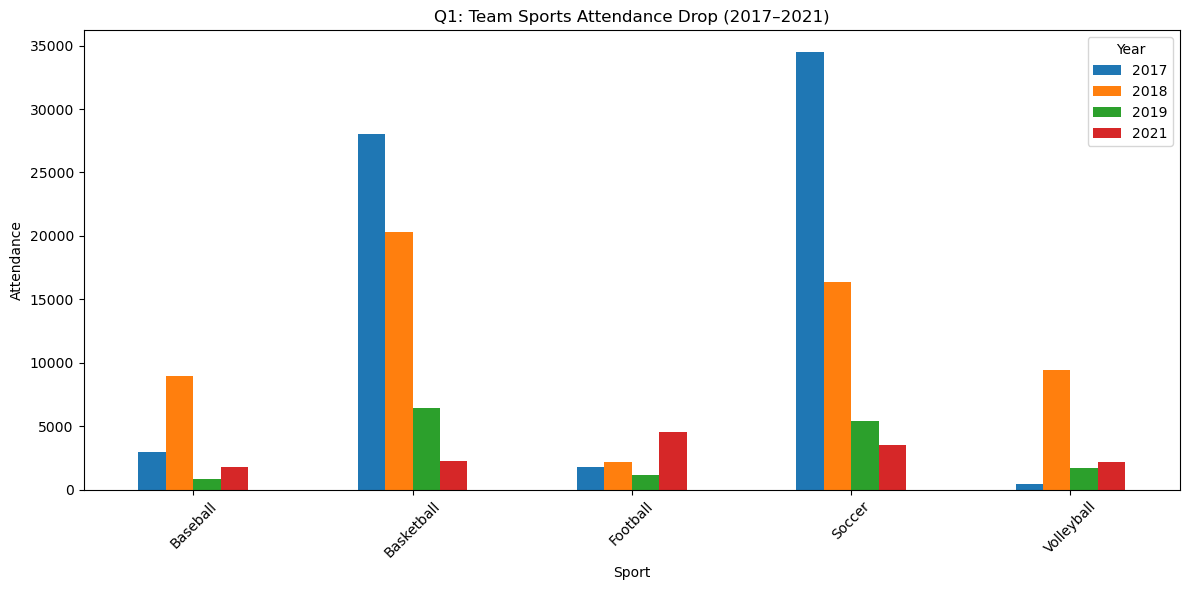

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Step 1: Clean and Prepare Data
df = pd.read_csv("Summer_Sports_Experience__2017_to_2021.csv")
df["Week Start Date"] = pd.to_datetime(df["Week Start Date"], errors='coerce')
df["Year"] = df["Week Start Date"].dt.year
df = df.dropna(subset=["Year"])
df["Year"] = df["Year"].astype(int)
df["Sports Played"] = df["Sports Played"].str.split(", ")
df = df.explode("Sports Played")

def clean_sport_name(s):
    s = s.lower()
    s = re.sub(r'[^a-z\s]', '', s)
    s = s.replace("and", "")
    return s.strip().title()

df["Sport"] = df["Sports Played"].apply(clean_sport_name)

# Step 2: Group by year and sport
attendance = df.groupby(["Year", "Sport"])["Attendance Sum"].sum().reset_index()

# Step 3: Pivot data for easier comparison
attendance_pivot = attendance.pivot(index="Sport", columns="Year", values="Attendance Sum").fillna(0)

# Step 4: Pre-COVID average vs Post-COVID
attendance_pivot["Pre_COVID_Avg"] = attendance_pivot[[2017, 2018, 2019]].mean(axis=1)
attendance_pivot["Change_2021"] = attendance_pivot[2021] - attendance_pivot["Pre_COVID_Avg"]

# Step 5: Q1 - Team Sports That Dropped
team_sports = ["Basketball", "Soccer", "Football", "Baseball", "Volleyball"]
team_df = attendance_pivot.loc[attendance_pivot.index.isin(team_sports)]

team_df[[2017, 2018, 2019, 2021]].plot(kind="bar", figsize=(12,6), title="Q1: Team Sports Attendance Drop (2017–2021)")
plt.ylabel("Attendance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Q2

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Summer_Sports_Experience__2017_to_2021.csv")

df.head()



,Borough Location,Park Location,Sports Played,Week Start Date,Week End Date,Sunday's Attendance,Monday's Attendance,Tuesday's Attendance,Wednesday's Attendance,Thursday's Attendance,Friday's Attendance,Saturday's Attendance,Attendance Sum
0,Queens,Playground for All Children,"Soccer, Basketball, ultimate Frisbee",04/23/2017,04/22/2017,25,20,30,26,22,100,37,260
1,Queens,Playground for All Children,Basketball,04/30/2017,05/06/2017,250,95,120,180,400,0,0,1045
2,Queens,Playground for All Children,Soccer,05/07/2017,05/13/2017,590,180,250,440,550,730,0,2740
3,Queens,Playground for All Children,Pillow Polo,05/14/2017,05/20/2017,550,708,58,680,975,333,670,3974
4,Queens,Playground for All Children,All sports,05/21/2017,05/27/2017,300,375,280,200,0,370,800,2325


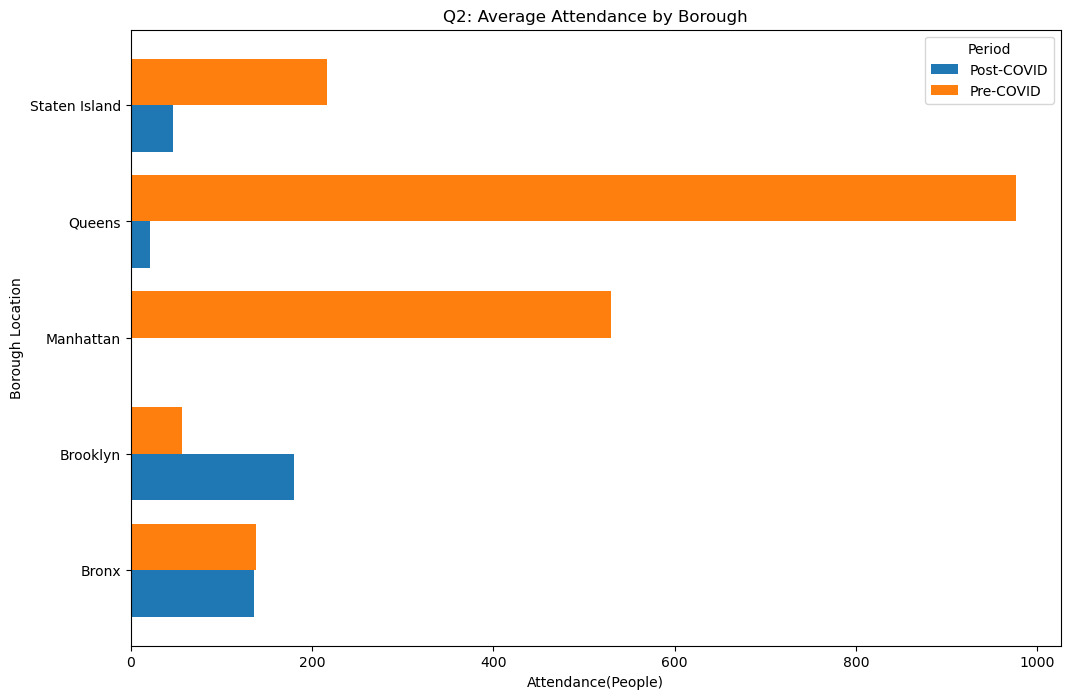

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (replace 'your_data.csv' with actual filename)
df = pd.read_csv('Summer_Sports_Experience__2017_to_2021.csv')

# Convert dates to datetime format
df['Week Start Date'] = pd.to_datetime(df['Week Start Date'])
df['Week End Date'] = pd.to_datetime(df['Week End Date'])

# Create COVID period classification
cutoff_date = pd.to_datetime('2020-03-15')
df['Period'] = ['Post-COVID' if x >= cutoff_date else 'Pre-COVID'
               for x in df['Week Start Date']]

# Create analysis-ready dataframe
analysis_df = df[[
    'Borough Location',
    'Park Location',
    'Sports Played',
    'Week Start Date',
    'Period',
    'Attendance Sum'
]].copy()

borough_comparison = analysis_df.groupby(['Period','Borough Location'])['Attendance Sum'].mean().unstack(0)
borough_comparison.plot(kind='barh', figsize=(12,8), width=0.8)
plt.title('Q2: Average Attendance by Borough')
plt.xlabel('Attendance(People)')
plt.show()


C:\Users\aamri\AppData\Local\Temp\ipykernel_18556\1857177259.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_gainers, x=top_gainers.index, y="Change_2021", palette=custom_colors)


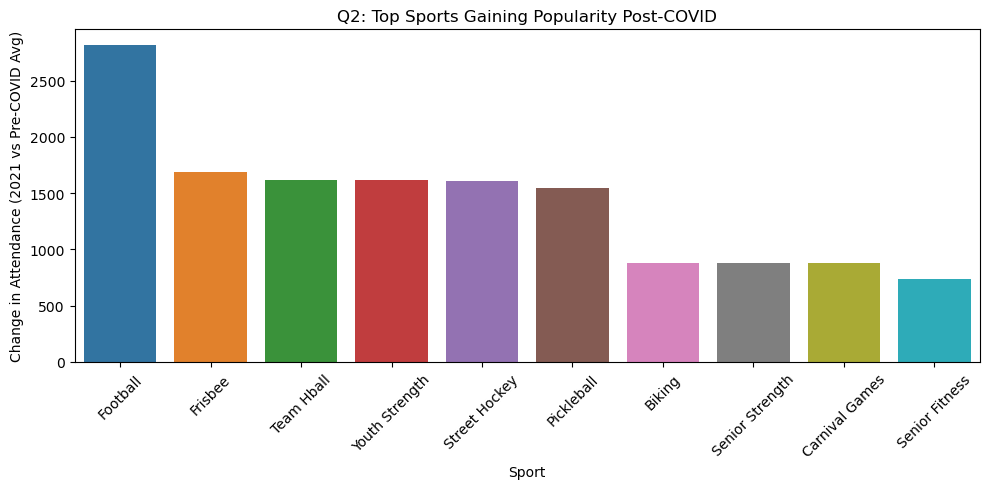

In [35]:
custom_colors = [
    '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
    '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'
]
top_gainers = attendance_pivot.sort_values("Change_2021", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_gainers, x=top_gainers.index, y="Change_2021", palette=custom_colors)
plt.title("Q2: Top Sports Gaining Popularity Post-COVID")
plt.ylabel("Change in Attendance (2021 vs Pre-COVID Avg)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Borough Location        425 non-null    object        
 1   Park Location           425 non-null    object        
 2   Sports Played           425 non-null    object        
 3   Week Start Date         425 non-null    datetime64[ns]
 4   Week End Date           425 non-null    datetime64[ns]
 5   Sunday's Attendance     425 non-null    int64         
 6   Monday's Attendance     425 non-null    int64         
 7   Tuesday's Attendance    425 non-null    int64         
 8   Wednesday's Attendance  425 non-null    int64         
 9   Thursday's Attendance   425 non-null    int64         
 10  Friday's Attendance     425 non-null    int64         
 11  Saturday's Attendance   425 non-null    int64         
 12  Attendance Sum          425 non-null    int64     

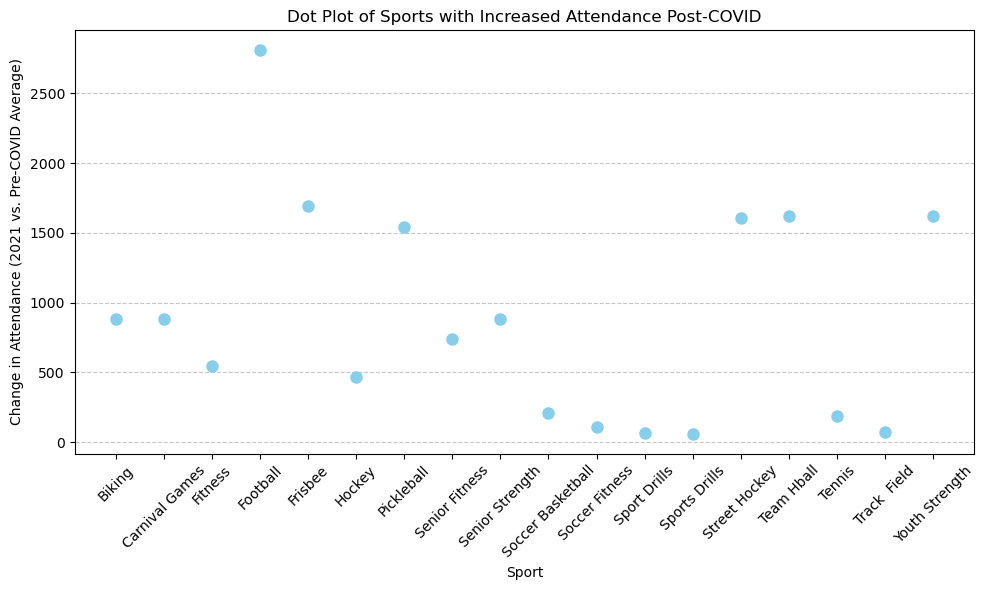

In [38]:
significant_gainers = attendance_pivot[attendance_pivot["Change_2021"] > 0]

plt.figure(figsize=(10, 6))
plt.plot(significant_gainers.index, significant_gainers["Change_2021"], "o", markersize=8, color="skyblue")

plt.xlabel("Sport")
plt.ylabel("Change in Attendance (2021 vs. Pre-COVID Average)")
plt.title("Dot Plot of Sports with Increased Attendance Post-COVID")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


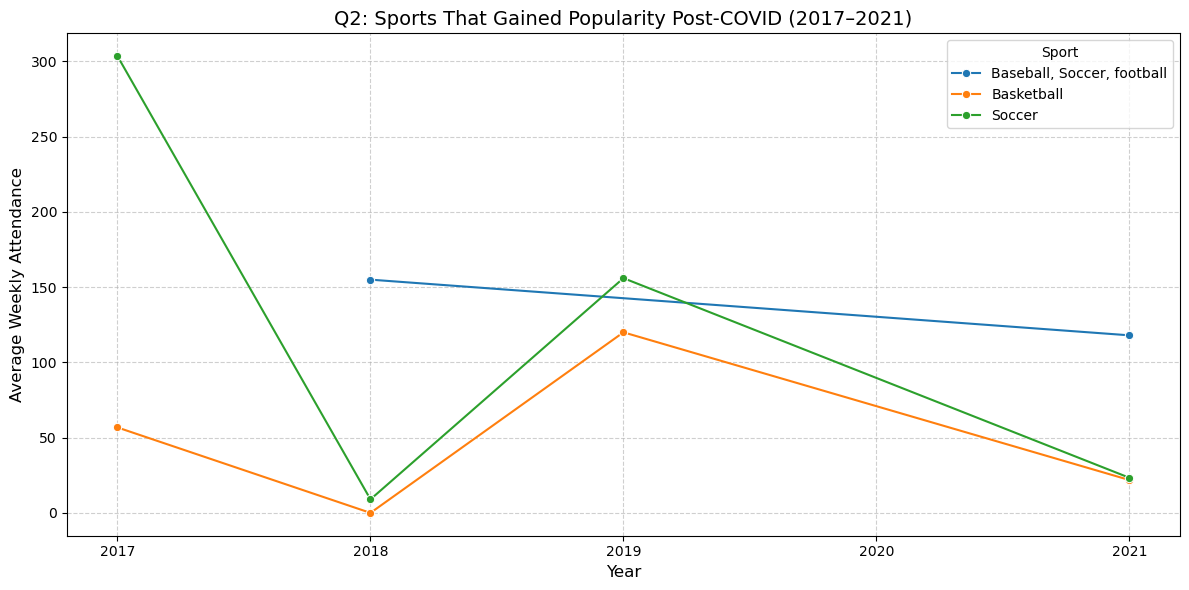

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Summer_Sports_Experience__2017_to_2021.csv')

# Convert dates
df['Week Start Date'] = pd.to_datetime(df['Week Start Date'])

# Extract year
df['Year'] = df['Week Start Date'].dt.year

# Filter for valid years
df = df[df['Year'].isin([2017, 2018, 2019, 2020, 2021])]

# Group by Sport and Year, calculate average attendance
sport_yearly_avg = df.groupby(['Sports Played', 'Year'])['Attendance Sum'].mean().reset_index()

# Identify sports with increasing attendance from pre-COVID (2017–2019 avg) to 2021
pre_covid_avg = sport_yearly_avg[sport_yearly_avg['Year'].isin([2017, 2018, 2019])]\
    .groupby('Sports Played')['Attendance Sum'].mean()

post_covid_2021 = sport_yearly_avg[sport_yearly_avg['Year'] == 2021]\
    .set_index('Sports Played')['Attendance Sum']

change = (post_covid_2021 - pre_covid_avg).dropna().sort_values(ascending=False)
top_gainers = change.head(5).index.tolist()  # Top 5 sports

# Filter the main data for top gaining sports
plot_data = sport_yearly_avg[sport_yearly_avg['Sports Played'].isin(top_gainers)]

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=plot_data, x='Year', y='Attendance Sum', hue='Sports Played', marker='o')

plt.title("Q2: Sports That Gained Popularity Post-COVID (2017–2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Weekly Attendance", fontsize=12)
plt.xticks([2017, 2018, 2019, 2020, 2021])
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Sport')
plt.tight_layout()
plt.show()


In [40]:
df_new_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Borough Location        425 non-null    object        
 1   Park Location           425 non-null    object        
 2   Sports Played           425 non-null    object        
 3   Week Start Date         425 non-null    datetime64[ns]
 4   Week End Date           425 non-null    object        
 5   Sunday's Attendance     425 non-null    int64         
 6   Monday's Attendance     425 non-null    int64         
 7   Tuesday's Attendance    425 non-null    int64         
 8   Wednesday's Attendance  425 non-null    int64         
 9   Thursday's Attendance   425 non-null    int64         
 10  Friday's Attendance     425 non-null    int64         
 11  Saturday's Attendance   425 non-null    int64         
 12  Attendance Sum          425 non-null    int64     

In [51]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv('Summer_Sports_Experience__2017_to_2021.csv')

# Convert dates
df['Week Start Date'] = pd.to_datetime(df['Week Start Date'])

# Extract year
df['Year'] = df['Week Start Date'].dt.year

# Filter for valid years
df = df[df['Year'].isin([2017, 2018, 2019, 2020, 2021])]

# Group by Sport and Year, calculate average attendance
sport_yearly_avg = df.groupby(['Sports Played', 'Year'])['Attendance Sum'].mean().reset_index()

# Identify sports with increasing attendance from pre-COVID (2017–2019 avg) to 2021
pre_covid_avg = sport_yearly_avg[sport_yearly_avg['Year'].isin([2017, 2018, 2019])]\
    .groupby('Sports Played')['Attendance Sum'].mean()

post_covid_2021 = sport_yearly_avg[sport_yearly_avg['Year'] == 2021]\
    .set_index('Sports Played')['Attendance Sum']

change = (post_covid_2021 - pre_covid_avg).dropna().sort_values(ascending=False)
top_gainers = change.head(5).index.tolist()  # Top 5 sports

# Filter the main data for top gaining sports
plot_data = sport_yearly_avg[sport_yearly_avg['Sports Played'].isin(top_gainers)]

# INTERACTIVE multi-line plot using Plotly
fig = px.line(
    plot_data,
    x='Year',
    y='Attendance Sum',
    color='Sports Played',
    markers=True,
    title="Q2: Sports That Gained Popularity Post-COVID (2017–2021)",
    labels={'Attendance Sum': 'Avg Weekly Attendance'}
)

fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis=dict(title='Average Weekly Attendance'),
    hovermode='x unified',
    template='plotly_white'
)

fig.show()
